# Session 8

In [3]:
import pandas as pd


## Loc and Iloc

Because of this potential confusion in the case of integer indexes, Pandas provides some special *indexer* attributes that explicitly expose certain indexing schemes.
These are not functional methods, but attributes that expose a particular slicing interface to the data in the ``Series``.

First, the ``loc`` attribute allows indexing and slicing that always references the explicit index:

In [24]:
row_1 = {'City': 'Alex', 'Pop': 655500 , 'Area' : 2500}    # Column name and value
row_2 = {'City': 'Mecca' , 'Pop': 254400 , 'Area' : 9820}    # Column name and value


data = pd.DataFrame(
                    [row_1, row_2],
                    index=[2,5]
                    )
data

,City,Pop,Area
2,Alex,655500,2500
5,Mecca,254400,9820


In [6]:
data.loc[5] # human eye

City     Mecca
Pop     254400
Area      9820
Name: 5, dtype: object

In [7]:
data.iloc[1]  # Computer eye

City     Mecca
Pop     254400
Area      9820
Name: 5, dtype: object

In [8]:
data

,City,Pop,Area
2,Alex,655500,2500
5,Mecca,254400,9820


In [9]:
data.loc[1:5]

,City,Pop,Area
2,Alex,655500,2500
5,Mecca,254400,9820


The ``iloc`` attribute allows indexing and slicing that always references the implicit Python-style index:

In [11]:
data.iloc[1:5]

,City,Pop,Area
5,Mecca,254400,9820


In [12]:
data

,City,Pop,Area
2,Alex,655500,2500
5,Mecca,254400,9820


In [13]:
data.iloc[2]

IndexError: single positional indexer is out-of-bounds

In [14]:
data

,City,Pop,Area
2,Alex,655500,2500
5,Mecca,254400,9820


In [16]:
data.iloc[0:5] # take index from computer eyes

,City,Pop,Area
2,Alex,655500,2500
5,Mecca,254400,9820


In [17]:
data.iloc[:5] # take index from computer eyes

,City,Pop,Area
2,Alex,655500,2500
5,Mecca,254400,9820


In [18]:
data.iloc[5]

IndexError: single positional indexer is out-of-bounds

In [19]:
data.iloc[1:5]

,City,Pop,Area
5,Mecca,254400,9820


In [20]:
# data = pd.DataFrame([row_1, row_2],
#                     index=[2,5])

Task

1- create dataframe 3 rows 2 columns with index  1 2 4

2- print 3rd row using two ways


In [33]:
# data = pd.DataFrame([row_1, row_2],
#                     index=[2,5])

A third indexing attribute, ``ix``, is a hybrid of the two, and for ``Series`` objects is equivalent to standard ``[]``-based indexing.
The purpose of the ``ix`` indexer will become more apparent in the context of ``DataFrame`` objects, which we will discuss in a moment.

One guiding principle of Python code is that "explicit is better than implicit."
The explicit nature of ``loc`` and ``iloc`` make them very useful in maintaining clean and readable code; especially in the case of integer indexes, I recommend using these both to make code easier to read and understand, and to prevent subtle bugs due to the mixed indexing/slicing convention.

In [21]:
data

,City,Pop,Area
2,Alex,655500,2500
5,Mecca,254400,9820


In [22]:
data.iloc[1]


City     Mecca
Pop     254400
Area      9820
Name: 5, dtype: object

In [23]:
data.loc[6]

KeyError: 6

In [32]:
data.reset_index(drop=True,inplace=True)
data

,City,Pop,Area
0,Alex,655500,2500
1,Mecca,254400,9820


Thus for array-style indexing, we need another convention.
Here Pandas again uses the ``loc``, ``iloc``, and ``ix`` indexers mentioned earlier.
Using the ``iloc`` indexer, we can index the underlying array as if it is a simple NumPy array (using the implicit Python-style index), but the ``DataFrame`` index and column labels are maintained in the result:

In [33]:
data

,City,Pop,Area
0,Alex,655500,2500
1,Mecca,254400,9820


In [35]:
data.loc[5]

KeyError: 5

In [36]:
data.iloc[1]

City     Mecca
Pop     254400
Area      9820
Name: 1, dtype: object

In [37]:
row_1 = {'Name': 'Ahmed',   'Age': 25 , 'GPA' : 4}    # Column name and value
row_2 = {'Name': 'Mahmoud', 'Age': 43 , 'GPA' : 2.5}    # Column name and value
row_3 = {'Name': 'Sara',    'Age': 33 , 'GPA' : 3}

data = pd.DataFrame([row_1, row_2,row_3],index=[1,2,4])
data

,Name,Age,GPA
1,Ahmed,25,4.0
2,Mahmoud,43,2.5
4,Sara,33,3.0


In [39]:
data.iloc[ :1 , 1:3 ]  # row  ,  cols

,Age,GPA
1,25,4.0


In [40]:
data

,Name,Age,GPA
1,Ahmed,25,4.0
2,Mahmoud,43,2.5
4,Sara,33,3.0


In [41]:
data.iloc[1:4 , :2]

,Name,Age
2,Mahmoud,43
4,Sara,33


In [ ]:
# data.iloc[:3, :2]

Similarly, using the ``loc`` indexer we can index the underlying data in an array-like style but using the explicit index and column names:

In [42]:
row_1 = {'City': 'Alex', 'Pop': 655500 , 'Area' : 2500}    # Column name and value
row_2 = {'City': 'Mecca' , 'Pop': 254400 , 'Area' : 9820}    # Column name and value


data = pd.DataFrame([row_1, row_2],
                    index=[2,5])
data['Density'] =  data['Pop'] / data['Area']
data


,City,Pop,Area,Density
2,Alex,655500,2500,262.200000
5,Mecca,254400,9820,25.906314


In [43]:
data.loc[ 0:1 , :'Area'  ]  # rows   , col    # loc  take real name  last is inclusive

,City,Pop,Area


In [44]:
data.loc[ 0:2 , :'Area'  ]  # rows   , col    # loc  take real name  last is inclusive

,City,Pop,Area
2,Alex,655500,2500


In [45]:
data

,City,Pop,Area,Density
2,Alex,655500,2500,262.200000
5,Mecca,254400,9820,25.906314


In [47]:
data.loc[ 2:5 , 'Area'  ]

2    2500
5    9820
Name: Area, dtype: int64

Any of the familiar NumPy-style data access patterns can be used within these indexers.
For example, in the ``loc`` indexer we can combine masking and fancy indexing as in the following:

In [48]:
data


,City,Pop,Area,Density
2,Alex,655500,2500,262.200000
5,Mecca,254400,9820,25.906314


In [50]:
data.loc[ data['Density'] > 100 , ['Pop', 'Density']  ]

,Pop,Density
2,655500,262.2


In [51]:
data.loc[ data.pop > 260000 , ['Pop', 'Density'] ]

TypeError: '>' not supported between instances of 'method' and 'int'

In [52]:
data.loc[ data['Pop'] > 260000 , ['Pop', 'Density'] ]

,Pop,Density
2,655500,262.2


In [53]:
data

,City,Pop,Area,Density
2,Alex,655500,2500,262.200000
5,Mecca,254400,9820,25.906314


Any of these indexing conventions may also be used to set or modify values; this is done in the standard way that you might be accustomed to from working with NumPy:

Task :

1- human names with salaries > 80000 

2- human with age less than 39 years



In [54]:
import pandas as pd

# Creating a DataFrame with 10 rows and 3 columns: names, salaries, and age
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace', 'Hannah', 'Ivan', 'Judy'],
    'Salary': [70000, 80000, 75000, 90000, 85000, 72000, 88000, 94000, 69000, 77000],
    'Age': [30, 40, 35, 45, 32, 38, 29, 50, 27, 42]
}

df = pd.DataFrame(data)
df

,Name,Salary,Age
0,Alice,70000,30
1,Bob,80000,40
2,Charlie,75000,35
3,David,90000,45
4,Eve,85000,32
5,Frank,72000,38
6,Grace,88000,29
7,Hannah,94000,50
8,Ivan,69000,27
9,Judy,77000,42


In [55]:
df.loc[df['Salary'] > 80000,['Name','Salary']]

,Name,Salary
3,David,90000
4,Eve,85000
6,Grace,88000
7,Hannah,94000


In [7]:
df.loc[df['Age'] < 39 ,['Name','Age']]

,Name,Age
0,Alice,30
2,Charlie,35
4,Eve,32
5,Frank,38
6,Grace,29
8,Ivan,27


In [56]:
df

,Name,Salary,Age
0,Alice,70000,30
1,Bob,80000,40
2,Charlie,75000,35
3,David,90000,45
4,Eve,85000,32
5,Frank,72000,38
6,Grace,88000,29
7,Hannah,94000,50
8,Ivan,69000,27
9,Judy,77000,42


In [57]:
df.iloc[ 3 , 1 ]

90000

In [58]:
df.iloc[ 3 , 1 ] =  100000

In [59]:
df

,Name,Salary,Age
0,Alice,70000,30
1,Bob,80000,40
2,Charlie,75000,35
3,David,100000,45
4,Eve,85000,32
5,Frank,72000,38
6,Grace,88000,29
7,Hannah,94000,50
8,Ivan,69000,27
9,Judy,77000,42


task 3

edit Salary of  Ivan to 20000

task 4

edit Age of Charile to 25

In [61]:
df.iloc[8,1] = 20000

In [63]:
df.iloc[2,2] = 25

In [64]:
df

,Name,Salary,Age
0,Alice,70000,30
1,Bob,80000,40
2,Charlie,75000,25
3,David,100000,45
4,Eve,85000,32
5,Frank,72000,38
6,Grace,88000,29
7,Hannah,94000,50
8,Ivan,20000,27
9,Judy,77000,42


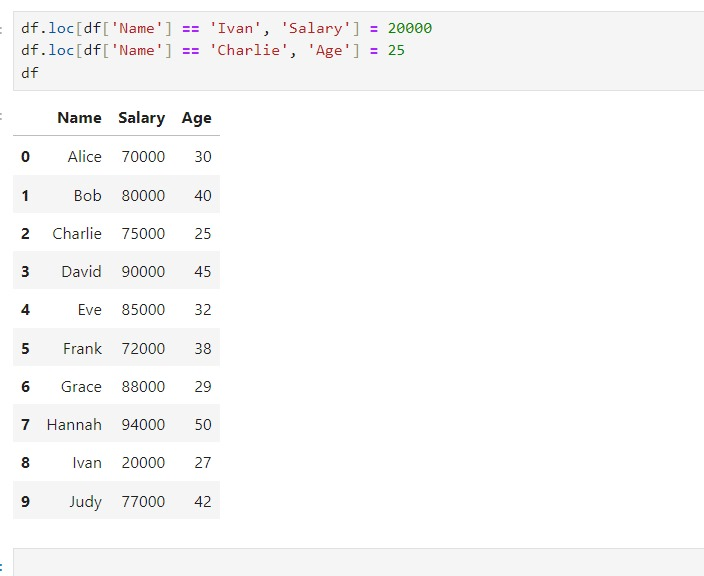

To build up your fluency in Pandas data manipulation, I suggest spending some time with a simple ``DataFrame`` and exploring the types of indexing, slicing, masking, and fancy indexing that are allowed by these various indexing approaches.

Similarly, direct masking operations are also interpreted row-wise rather than column-wise:

In [67]:
df

,Name,Salary,Age
0,Alice,70000,30
1,Bob,80000,40
2,Charlie,75000,25
3,David,100000,45
4,Eve,85000,32
5,Frank,72000,38
6,Grace,88000,29
7,Hannah,94000,50
8,Ivan,20000,27
9,Judy,77000,42


In [68]:
df['Salary'] > 90000  # Boolean indexing

0    False
1    False
2    False
3     True
4    False
5    False
6    False
7     True
8    False
9    False
Name: Salary, dtype: bool

In [69]:
df[df['Salary'] > 90000 ]

,Name,Salary,Age
3,David,100000,45
7,Hannah,94000,50


In [70]:
df[df['Age'] < 35 ]

,Name,Salary,Age
0,Alice,70000,30
2,Charlie,75000,25
4,Eve,85000,32
6,Grace,88000,29
8,Ivan,20000,27


task 

- get data of Alice by using masking index

- print Salaries < 20000

In [71]:
df[df['Name'] == 'Alice']

,Name,Salary,Age
0,Alice,70000,30


In [72]:
df[df['Salary'] < 20000 ]

,Name,Salary,Age


In [73]:
df

,Name,Salary,Age
0,Alice,70000,30
1,Bob,80000,40
2,Charlie,75000,25
3,David,100000,45
4,Eve,85000,32
5,Frank,72000,38
6,Grace,88000,29
7,Hannah,94000,50
8,Ivan,20000,27
9,Judy,77000,42


### Operating on Null Values

As we have seen, Pandas treats ``None`` and ``NaN`` as essentially interchangeable for indicating missing or null values.
To facilitate this convention, there are several useful methods for detecting, removing, and replacing null values in Pandas data structures.
They are:

- ``isnull()``: Generate a boolean mask indicating missing values
- ``notnull()``: Opposite of ``isnull()``
- ``dropna()``: Return a filtered version of the data
- ``fillna()``: Return a copy of the data with missing values filled or imputed

We will conclude this section with a brief exploration and demonstration of these routines.

#### 1- Detecting null values
Pandas data structures have two useful methods for detecting null data: ``isnull()`` and ``notnull()``.
Either one will return a Boolean mask over the data. For example:

In [75]:
import numpy as np

In [78]:
data = pd.Series([1 , np.nan , 'hello', None])
data

0        1
1      NaN
2    hello
3     None
dtype: object

In [79]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [80]:
data.notnull()

0     True
1    False
2     True
3    False
dtype: bool

As mentioned in [Data Indexing and Selection](03.02-Data-Indexing-and-Selection.ipynb), Boolean masks can be used directly as a ``Series`` or ``DataFrame`` index:

In [81]:
data[data.notnull()]

0        1
2    hello
dtype: object

The ``isnull()`` and ``notnull()`` methods produce similar Boolean results for ``DataFrame``s.

#### 2- Fixing

#### Dropping null values

In addition to the masking used before, there are the convenience methods,

 ``dropna()``
(which removes NA values) and

 ``fillna()`` (which fills in NA values). For a ``Series``,
the result is straightforward:

In [ ]:
data

In [ ]:
data.dropna(inplace=False)

In [ ]:
data

Task

1- create Series  with 5 rows , index= 6 2 5 4 8

2- put null and none

3- drop nulls

4- print shape of rest series

In [ ]:
data = pd.Series([1 , np.nan , 'hello', None,55],
                 index=[2,4,5,6,8])
data

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.shape

In [ ]:
data

In [ ]:
pd.DataFrame([[1 , 2],[3,4]])

In [ ]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,   None]])
df

In [ ]:
df[df.notnull()]

How to change columns name

In [ ]:
df.columns

In [ ]:
df.columns = ['a','b','c']

In [ ]:
df

In [ ]:
df.isnull()

In [ ]:
df

In [ ]:
df.isnull().sum()   # get nulls in evey columns

In [ ]:
df.isnull().sum().sum() # count all nulls in whole dataframe

We cannot drop single values from a ``DataFrame``; we can only drop full rows or full columns.
Depending on the application, you might want one or the other, so ``dropna()`` gives a number of options for a ``DataFrame``.

By default, ``dropna()`` will drop all rows in which *any* null value is present:

In [ ]:
df

In [ ]:
df.dropna(inplace=False)

Alternatively, you can drop NA values along a different axis; ``axis=1`` drops all columns containing a null value:

In [ ]:
df

In [ ]:
df.dropna(axis='columns')

In [ ]:
df.dropna(axis='rows')  # by default

But this drops some good data as well; you might rather be interested in dropping rows or columns with *all* NA values, or a majority of NA values.
This can be specified through the ``how`` or ``thresh`` parameters, which allow fine control of the number of nulls to allow through.

The default is ``how='any'``, such that any row or column (depending on the ``axis`` keyword) containing a null value will be dropped.
You can also specify ``how='all'``, which will only drop rows/columns that are *all* null values:

In [ ]:
df['d'] = np.nan
df

In [ ]:
df.dropna(axis='columns',
            how='all')

For finer-grained control, the ``thresh`` parameter lets you specify a minimum number of non-null values for the row/column to be kept:

In [ ]:
df

In [ ]:
df.dropna(axis='columns', thresh=2) # thresh  minimum of real numbers

Here the first and last row have been dropped, because they contain only two non-null values.

Task


1- create data frame with 4 columns and 4 rows with

1 columns contains all nulls

the last 3 columns contain at least 1 nulls

2- drop nulls based on rows

3- drop nulls based on columns

4- drop nulls based on columns all

5- drop nulls based on thershold 2

For a ``DataFrame``, there are more options.
Consider the following ``DataFrame``:

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,   None]])
df

In [ ]:
df['New'] = 10
df